<a href="https://colab.research.google.com/github/mahal7446/Kisan_Sathi/blob/main/Model_Training2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

BASE_DIR = "/content/drive/MyDrive/Kisan_Sathi_Split"

TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR   = os.path.join(BASE_DIR, "val")
TEST_DIR  = os.path.join(BASE_DIR, "test")

print("Train path exists:", os.path.exists(TRAIN_DIR))
print("Val path exists:", os.path.exists(VAL_DIR))
print("Test path exists:", os.path.exists(TEST_DIR))


Train path exists: False
Val path exists: False
Test path exists: False


In [ ]:
classes = sorted(os.listdir(TRAIN_DIR))
num_classes = len(classes)

print("Classes:", classes)
print("Number of classes:", num_classes)


Classes: ['Blackgram_Anthracnose', 'Blackgram_Healthy', 'Blackgram_LeafCrinckle', 'Blackgram_PowderyMildew', 'Blackgram_YellowMosaic', 'Corn_Blight', 'Corn_CommonRust', 'Corn_GrayLeafSpot', 'Corn_Healthy']
Number of classes: 9


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 1403 images belonging to 9 classes.


In [ ]:
val_test_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 299 images belonging to 9 classes.
Found 305 images belonging to 9 classes.


In [ ]:
print("Class indices:")
print(train_generator.class_indices)


Class indices:
{'Blackgram_Anthracnose': 0, 'Blackgram_Healthy': 1, 'Blackgram_LeafCrinckle': 2, 'Blackgram_PowderyMildew': 3, 'Blackgram_YellowMosaic': 4, 'Corn_Blight': 5, 'Corn_CommonRust': 6, 'Corn_GrayLeafSpot': 7, 'Corn_Healthy': 8}


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model


In [ ]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model
base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,269,513 (8.66 MB)

 Trainable params: 11,529 (45.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [ ]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6
    ),
    ModelCheckpoint(
        filepath='best_model_stage1.h5',
        monitor='val_loss',
        save_best_only=True
    )
]


In [ ]:
EPOCHS = 15

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1451 - loss: 2.9160 

44/44 ━━━━━━━━━━━━━━━━━━━━ 652s 15s/step - accuracy: 0.1451 - loss: 2.9138 - val_accuracy: 0.1706 - val_loss: 2.4084 - learning_rate: 3.0000e-05
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1441 - loss: 2.6219

44/44 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.1444 - loss: 2.6214 - val_accuracy: 0.1873 - val_loss: 2.2235 - learning_rate: 3.0000e-05
Epoch 3/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2275 - loss: 2.4182

44/44 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.2272 - loss: 2.4174 - val_accuracy: 0.2107 - val_loss: 2.0763 - learning_rate: 3.0000e-05
Epoch 4/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2019 - loss: 2.3062

44/44 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.2020 - loss: 2.3055 - val_accuracy: 0.2642 - val_loss: 1.9558 - learning_rate: 3.0000e-05
Epoch 5/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2224 - loss: 2.1283

44/44 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.2226 - loss: 2.1290 - val_accuracy: 0.3110 - val_loss: 1.8526 - learning_rate: 3.0000e-05
Epoch 6/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2500 - loss: 2.0802

44/44 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.2504 - loss: 2.0791 - val_accuracy: 0.3746 - val_loss: 1.7534 - learning_rate: 3.0000e-05
Epoch 7/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3029 - loss: 1.9819

44/44 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.3028 - loss: 1.9816 - val_accuracy: 0.3946 - val_loss: 1.6653 - learning_rate: 3.0000e-05
Epoch 8/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2852 - loss: 1.9896

44/44 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.2854 - loss: 1.9881 - val_accuracy: 0.4448 - val_loss: 1.5854 - learning_rate: 3.0000e-05
Epoch 9/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3384 - loss: 1.8150

44/44 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.3386 - loss: 1.8148 - val_accuracy: 0.4749 - val_loss: 1.5110 - learning_rate: 3.0000e-05
Epoch 10/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3975 - loss: 1.6994

44/44 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.3973 - loss: 1.7001 - val_accuracy: 0.5151 - val_loss: 1.4418 - learning_rate: 3.0000e-05
Epoch 11/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3869 - loss: 1.6704

44/44 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.3870 - loss: 1.6704 - val_accuracy: 0.5452 - val_loss: 1.3783 - learning_rate: 3.0000e-05
Epoch 12/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3818 - loss: 1.6859

44/44 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.3826 - loss: 1.6845 - val_accuracy: 0.5686 - val_loss: 1.3186 - learning_rate: 3.0000e-05
Epoch 13/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4270 - loss: 1.5500

44/44 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.4276 - loss: 1.5494 - val_accuracy: 0.5853 - val_loss: 1.2644 - learning_rate: 3.0000e-05
Epoch 14/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4400 - loss: 1.5101

44/44 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.4403 - loss: 1.5095 - val_accuracy: 0.6154 - val_loss: 1.2167 - learning_rate: 3.0000e-05
Epoch 15/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4743 - loss: 1.4630

44/44 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.4747 - loss: 1.4624 - val_accuracy: 0.6455 - val_loss: 1.1708 - learning_rate: 3.0000e-05


In [ ]:
# Unfreeze the top layers of MobileNetV2
base_model.trainable = True

# Freeze all layers except last 30
for layer in base_model.layers[:-30]:
    layer.trainable = False


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [25]:
FINE_TUNE_EPOCHS = 10

history_fine = model.fit(
    train_generator,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6880 - loss: 0.9323

44/44 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.6890 - loss: 0.9300 - val_accuracy: 0.8361 - val_loss: 0.5925 - learning_rate: 3.0000e-05
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8115 - loss: 0.5665

44/44 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.8120 - loss: 0.5656 - val_accuracy: 0.8528 - val_loss: 0.5003 - learning_rate: 3.0000e-05
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8857 - loss: 0.3876

44/44 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.8854 - loss: 0.3878 - val_accuracy: 0.8629 - val_loss: 0.4393 - learning_rate: 3.0000e-05
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8798 - loss: 0.3706

44/44 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.8797 - loss: 0.3704 - val_accuracy: 0.8696 - val_loss: 0.3720 - learning_rate: 3.0000e-05
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9125 - loss: 0.3030

44/44 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.9123 - loss: 0.3028 - val_accuracy: 0.8729 - val_loss: 0.3622 - learning_rate: 3.0000e-05
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9202 - loss: 0.2452

44/44 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.9201 - loss: 0.2453 - val_accuracy: 0.8796 - val_loss: 0.3472 - learning_rate: 3.0000e-05
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9129 - loss: 0.2467

44/44 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.9131 - loss: 0.2463 - val_accuracy: 0.8829 - val_loss: 0.3094 - learning_rate: 3.0000e-05
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9323 - loss: 0.1983

44/44 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.9325 - loss: 0.1982 - val_accuracy: 0.8863 - val_loss: 0.2934 - learning_rate: 3.0000e-05
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.9427 - loss: 0.1878 - val_accuracy: 0.8896 - val_loss: 0.2976 - learning_rate: 3.0000e-05
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9524 - loss: 0.1618

44/44 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.9525 - loss: 0.1618 - val_accuracy: 0.8997 - val_loss: 0.2806 - learning_rate: 3.0000e-05


In [26]:
from tensorflow.keras.models import load_model

model = load_model('best_model_stage1.h5')


In [27]:
import numpy as np

test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())


10/10 ━━━━━━━━━━━━━━━━━━━━ 84s 9s/step


In [28]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred_classes,
    target_names=class_names
))


                         precision    recall  f1-score   support

  Blackgram_Anthracnose       1.00      0.86      0.92        35
      Blackgram_Healthy       0.85      1.00      0.92        34
 Blackgram_LeafCrinckle       1.00      0.96      0.98        23
Blackgram_PowderyMildew       0.74      0.93      0.82        27
 Blackgram_YellowMosaic       1.00      0.85      0.92        34
            Corn_Blight       0.88      0.39      0.55        38
        Corn_CommonRust       0.95      0.97      0.96        38
      Corn_GrayLeafSpot       0.66      0.92      0.77        38
           Corn_Healthy       0.93      1.00      0.96        38

               accuracy                           0.87       305
              macro avg       0.89      0.88      0.87       305
           weighted avg       0.89      0.87      0.86       305



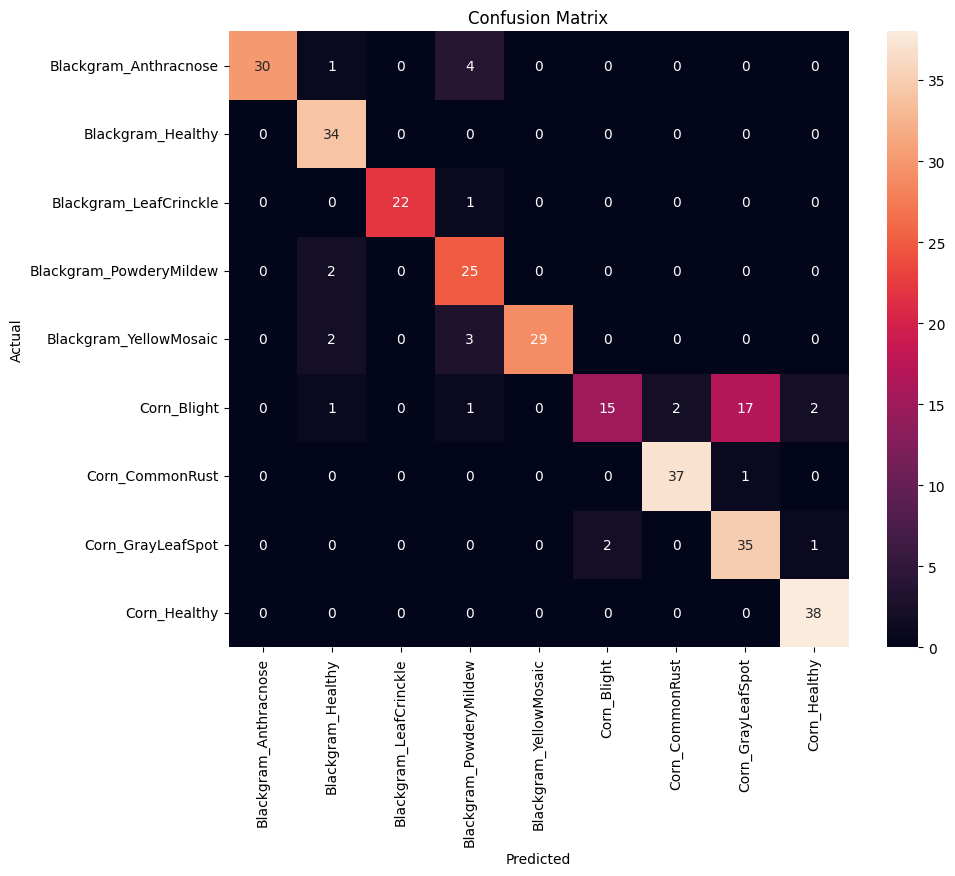

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [30]:
model.save("plant_disease_model_finetuned.h5")
print("Model saved successfully")


Model saved successfully


In [32]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load model
model = load_model("plant_disease_model_finetuned.h5")

# Class labels (same order as training)
class_names = list(train_generator.class_indices.keys())

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    print(f"Predicted Disease: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")


In [33]:
predict_image("/content/drive/MyDrive/Kisan_Sathi_Split/test/Corn_CommonRust/Corn_Common_Rust (474).JPG")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Disease: Corn_CommonRust
Confidence: 99.36%


In [34]:
model.save("/content/drive/MyDrive/Kisan_Sathi_Split/plant_disease_model_finetuned.h5")
print("Model saved to Google Drive successfully!")


Model saved to Google Drive successfully!
